## Simulação das concentrações a 1200 K

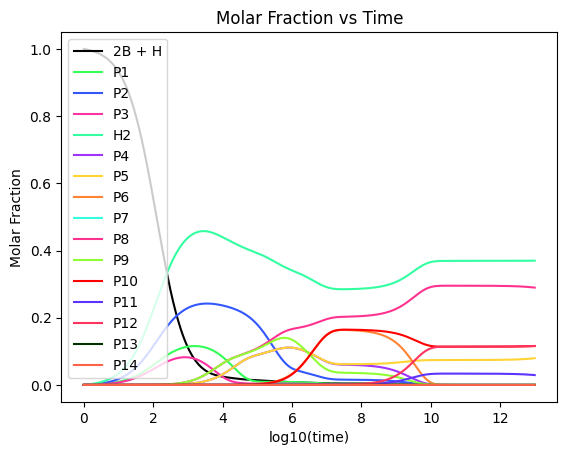

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

'''
Combustion mechanism to 2-butanone + H

d(2b)/dt = - k1f*2b*h - k2f*2b*h - k3f*2b*h + k1b*p1*h2  + k2b*p2*h2  + k3b*p3*h2
d(h)/dt  = - k1f*2b*h - k2f*2b*h - k3f*2b*h + k1b*p1*h2 + k2b*p2*h2 + k3b*p3*h2
d(p1)/dt =  + k1f*2b*h + k4b*p3 + k5b*p2 + k7b*p4*p5 - k4f*p1 - k5f*p1 - k7f*p1 - k1b*p1*h2
d(p2)/dt =  + k2f*2b*h + k5f*p1 + k6b*p3 + k8b*p6*p7 - k5b*p2  - k6f*p2  - k8f*p2 - k2b*p2*h2
d(p3)/dt = + k3f*2b*h - k3b*p3*h2 + k4f*p1 -k4b*p3 + k6f*p2 - k6b*p3 - k9f*p3 + k9b*p8*p9
d(h2)/dt = + k1f*2b*h + k2f*2b*h + k3f*2b*h - k1b*p1*h2 - k2b*p2*h2 - k3b*p3*h2
d(p4)/dt = + k7f*p1 + k13b*p8*p9 + k14b*p13*p8 - k7b*p4*p5 - k13f*p5*p4 -k14f*p5*p4
d(p5)/dt = + k7f*p1 + k11b*p8*p11 + k12b*p8*p12 + k13b*p8*p9 + k14b*p13*p8 + k15b*p8*p14 - k7b*p4*p5 - k11f*p5*p9 - k12f*p5*p6 - k13f*p5*p4 - k14f*p5*p4 - k15f*p5*p7
d(p6)/dt = + k8f*p2 + k10f*p9 + k12b*p8*p12 - k8b*p6*p7 -k10b*p6*p10 - k12f*p5*p6
d(p7)/dt = + k8f*p2 + k15b*p8*p14 - k8b*p6*p7 - k15f*p5*p7
d(p8)/dt = + k9f*p3 + k11f*p5*p9 + k12f*p5*p6 + k13f*p5*p4 + k14f*p5*p4 + k15f*p5*p4 - k9b*p8*p9 - k11b*p8*p11 - k12b*p8*p12 - k13b*p8*p9 - k14b*p8*p13 - k15b*p8*p14
d(p9)/dt = + k9f*p3 + k11b*p8*p11 + k13f*p5*p4  + k10b*p6*p10 - k9b*p8*p9 - k10f*p9 - k11f*p5*p9 - k13b*p8*p9
d(p10)/dt = +k10f*p9 - k10b*p6*p10
d(p11)/dt = +k11f*p5*p9 - k11b*p8*p11
d(p12)/dt = +k12f*p5*p6 - k12b*p8*p12
d(p13)/dt = + k14f*p5*p4 - k14b*p8*p13
d(p14)/dt = + k15f*p5*p7 - k15b*p8*p14


Species order:

# c[0], c[1],c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11], c[12], c[13], c[14], c[15], c[16]

[2b,    h,    p1,   p2, p3,    h2,    p4,  p5,    p6,   p7,   p8,    p9,   p10,   p11,   p12, p13,  p14]



k = [(()*tons),(()*tons),(()*tons),(()*tons),(()*tons),(()*tons),
        ((()*tons*1000)/NA),((()*tons*1000)/NA), ((()*tons*1000)/NA), ((()*tons*1000)/NA) ,((()*tons*1000)/NA),
        ((()*tons*1000)/NA), ((()*tons*1000)/NA), (()*tons), ((()*tons*1000)/NA), (()*tons),
        ((()*tons*1000)/NA), (()*tons), ((()*tons*1000)/NA), (()*tons),
        (()*tons), (()*tons), (()*tons), (()*tons), (()*tons),
        (()*tons), (()*tons), (()*tons), (()*tons), (()*tons)]

Constants order:

 k = [k1f,  k1b,  k2f,  k2b,  k3f,  k3b,  k4f,  k4b,  k5f,  k5b,  k6f,   k6b,   k7f,   k7b,   k8f,   k8b,   k9f,   k9b,   k10f ]
      k[0], k[1], k[2], k[3], k[4], k[5], k[6], k[7], k[8], k[9], k[10], k[11], k[12], k[13], k[14], k[15], k[16], k[17], k[18]
 k = [k10b,  k11f,  k11b,  k12f,  k12b,  k13f,  k13b,  k14f,  k14b,  k15f,  k15b]
      k[19], k[20], k[21], k[22], k[23], k[24], k[25], k[26], k[27], k[28], k[29]

# scipy.integrate.solve_ivp
'''


# Define parameters
tons = 1 / 1.E-9         # time factor to nanoseconds
R = 1.98587
NA = 6.02E23


# Define rate constants --  Temperature: 1200 K

k = [((2.156E-12)*tons),((1.126E-14)*tons),((4.21E-12)*tons),((4.46E-15)*tons),((1.720E-12)*tons),((1.913E-14)*tons),
     (((4.907E+06)*tons*1000)/NA),(((1.046E+07)*tons*1000)/NA), (((6.342E+03)*tons*1000)/NA), (((1.286E+03)*tons*1000)/NA) ,(((5.294E+05)*tons*1000)/NA),
     (((5.562E+06)*tons*1000)/NA), (((1.981E+07)*tons*1000)/NA), ((8.092E-15)*tons), (((1.479E+04)*tons*1000)/NA), ((8.454E-15)*tons),
     (((8.166E+07)*tons*1000)/NA), ((7.896E-15)*tons), (((1.552E+05)*tons*1000)/NA), ((9.935E-17)*tons),
        ((1.494E-18)*tons), ((1.977E-23)*tons), ((8.644E-19)*tons), ((5.144E-28)*tons), ((5.343E-19)*tons),
        ((3.158E-21)*tons), ((3.693E-19)*tons), ((5.918E-18)*tons), ((6.701E-21)*tons), ((3.415E-21)*tons)]



# Define rate equations

def rate(t, c):
    '''
    The right side from the equations sistem

    t: time

    concentration: numpy array size 17

    return: one array size 17, for more information see docstring of this module

    '''

    der_concentra = np.empty(17)

    der_concentra[0] = - k[0]*c[0]*c[1] - k[2]*c[0]*c[1] - k[4]*c[0]*c[1] + k[1]*c[2]*c[5]  + k[3]*c[3]*c[5]  + k[5]*c[4]*c[5] # d(2b)/dt
    der_concentra[1]  = - k[0]*c[0]*c[1] - k[2]*c[0]*c[1] - k[4]*c[0]*c[1] + k[1]*c[2]*c[5] + k[3]*c[3]*c[5] + k[5]*c[4]*c[5]   # d(h)/dt
    der_concentra[2] =  + k[0]*c[0]*c[1] + k[7]*c[4] + k[9]*c[3] + k[13]*c[6]*c[7] - k[6]*c[2] - k[8]*c[2] - k[12]*c[2] - k[1]*c[2]*c[5]  #d(p1)/dt
    der_concentra[3] =  + k[2]*c[0]*c[1] + k[8]*c[2] + k[11]*c[4] + k[15]*c[8]*c[9] - k[9]*c[3]  - k[10]*c[3]  - k[14]*c[3] - k[3]*c[3]*c[5]  # d(p2)/dt
    der_concentra[4] = + k[4]*c[0]*c[1] - k[5]*c[4]*c[5] + k[6]*c[2] -k[7]*c[4] + k[10]*c[3] - k[11]*c[4] - k[16]*c[4] + k[17]*c[10]*c[11]   # d(p3)/dt
    der_concentra[5] = + k[0]*c[0]*c[1] + k[2]*c[0]*c[1] + k[4]*c[0]*c[1] - k[1]*c[2]*c[5] - k[3]*c[3]*c[5] - k[5]*c[4]*c[5]  # d(h2)/dt
    der_concentra[6] = + k[12]*c[2] + k[25]*c[10]*c[11] + k[27]*c[15]*c[10] - k[13]*c[6]*c[7] - k[24]*c[7]*c[6] - k[27]*c[7]*c[6]  # d(p4)/dt
    der_concentra[7] = (+ k[12]*c[2] + k[21]*c[10]*c[13] + k[23]*c[10]*c[14] + k[25]*c[10]*c[11] + k[27]*c[15]*c[10] + k[29]*c[10]*c[16]
                        - k[13]*c[6]*c[7] - k[20]*c[7]*c[11] - k[22]*c[7]*c[8] - k[24]*c[7]*c[6] - k[26]*c[7]*c[6] - k[28]*c[7]*c[9] )    # d(p5)/dt
    der_concentra[8] = + k[14]*c[3] + k[18]*c[11] + k[23]*c[10]*c[14] - k[15]*c[8]*c[9] -k[19]*c[8]*c[12] - k[22]*c[7]*c[8]  # d(p6)/dt
    der_concentra[9] = + k[14]*c[3] + k[29]*c[10]*c[16] - k[15]*c[8]*c[9] - k[28]*c[7]*c[9] # d(p7)/dt
    der_concentra[10] = (+ k[16]*c[4] + k[20]*c[7]*c[11] + k[22]*c[7]*c[8] + k[24]*c[7]*c[6] + k[26]*c[7]*c[6] + k[28]*c[7]*c[6]
                         - k[17]*c[10]*c[11] - k[21]*c[10]*c[13] - k[23]*c[10]*c[14] - k[25]*c[10]*c[11] - k[27]*c[10]*c[15] - k[29]*c[10]*c[16])  # d(p8)/dt
    der_concentra[11] = + k[16]*c[4] + k[21]*c[10]*c[13] + k[24]*c[7]*c[6]  + k[19]*c[8]*c[12] - k[17]*c[10]*c[11] - k[18]*c[11] - k[20]*c[7]*c[11] - k[25]*c[10]*c[11]    #d(p9)/dt
    der_concentra[12] = +k[18]*c[11] - k[19]*c[8]*c[12]  # d(p10)/dt
    der_concentra[13] = +k[20]*c[7]*c[11] - k[21]*c[10]*c[13]  # d(p11)/dt
    der_concentra[14] = +k[22]*c[7]*c[8] - k[23]*c[10]*c[14]    # d(p12)/dt
    der_concentra[15]= + k[26]*c[7]*c[6] - k[27]*c[10]*c[15]    # d(p13)/dt
    der_concentra[16] = + k[28]*c[7]*c[9] - k[29]*c[10]*c[16]   # d(p14)/dt

    return der_concentra


# Time span and initial conditions
tf = np.concatenate([
    np.arange(1E0, 10E0, 0.1E0),
    np.arange(1E1, 10E1, 0.1E1),
    np.arange(1E2, 10E2, 0.1E2),
    np.arange(1E3, 10E3, 0.1E3),
    np.arange(1E4, 10E4, 0.1E4),
    np.arange(1E5, 10E5, 0.1E5),
    np.arange(1E6, 10E6, 0.1E6),
    np.arange(1E7, 10E7, 0.1E7),
    np.arange(1E8, 10E8, 0.1E8),
    np.arange(1E9, 10E9, 0.1E9),
    np.arange(1E10, 10E10, 0.1E10),
    np.arange(1E11, 10E11, 0.1E11),
    np.arange(1E12, 10E12, 0.1E12),
])

# Initial concentrations
c = [1.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]

# Solve the system using solve_ivp
solution = solve_ivp(rate, [tf[0], tf[-1]], c, t_eval=tf, method='BDF',dense_output=True)

# Get the solution (concentrations over time)
x = solution.y


# Calculate total concentration (sum over each row in Python is axis=0)
conc = np.sum(x, axis=0)

# Calculate molar fractions
mf = x / conc

####### Plot section  #######


# Colors for each concentration

colors = [
    '#000000',  # Black
    '#FF5733',  # Warm Red
    '#33FF57',  # Bright Green
    '#3357FF',  # Bright Blue
    '#FF33A1',  # Pink
    '#33FFA1',  # Mint Green
    '#A133FF',  # Purple
    '#FFD433',  # Yellow
    '#FF8333',  # Orange
    '#33FFDD',  # Cyan
    '#FF338F',  # Magenta
    '#8FFF33',  # Light Green
    '#FF0000',  # Light Orange
    '#5D33FF',  # Indigo
    '#FF335E',  # Coral
    '#003300',
    '#ff6347',  # Tomato
    '2f4f4f'
]

legends = ['2B','H','P1','P2','P3','H2','P4','P5','P6','P7','P8','P9', 'P10','P11','P12', 'P13', 'P14']

num_species = mf.shape[0]  # Assuming each row in mf is a species


sum = mf[0,:] + mf[1,:]  # Sum of molar fraction of reactants

plt.plot(np.log10(tf), sum, color='black', label='2B + H')  # Plot reactants

for i in range(num_species):
  if i != 0 and i !=1:
    plt.plot(np.log10(tf), mf[i, :], color=colors[i % len(colors)], label=legends[i])


plt.xlabel('log10(time)')
plt.ylabel('Molar Fraction')
plt.title('Molar Fraction vs Time')
plt.figsize=(10.,3.)
plt.legend()
plt.show()

# Save the data to files
np.savetxt("time.dat", tf, fmt='%e')
np.savetxt("molar_fraction_butanone_1200.dat", mf.T, fmt='%e')
